In [1]:
import pandas as pd
# We introduce polynomial features to existing features to capture the non-linear relationship data points
# y = w1x1 + w2x2 + w0
# y = w1x1 + w2x2 + w3x1^n + w4x2^n + w0
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Age,Salary
0,0,0.417022,0.890405
1,1,0.720324,3.154715
2,2,0.000114,0.169337
3,3,0.302333,0.681891
4,4,0.146756,0.520273


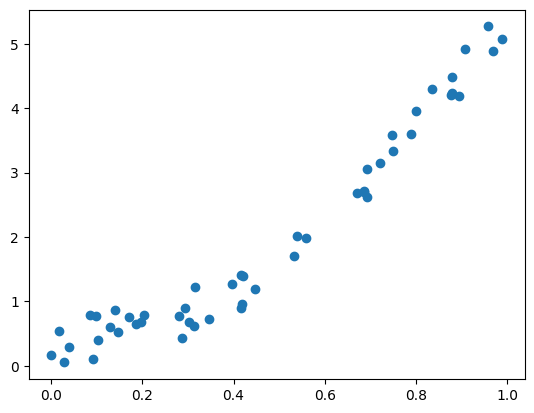

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'] , df['Salary'])

In [3]:
import numpy as np
X = np.array(df['Age']).reshape(-1 , 1)
Y = np.array(df['Salary']).reshape(-1 , 1)

In [4]:
Y

array([[0.89040523],
       [3.15471505],
       [0.16933685],
       [0.68189118],
       [0.52027333],
       [0.10221186],
       [0.65167369],
       [0.72391183],
       [1.26494445],
       [2.01473469],
       [0.96576416],
       [2.69160443],
       [0.78281395],
       [4.23864499],
       [0.05085862],
       [2.68744501],
       [1.40711419],
       [1.97633521],
       [0.87346449],
       [0.68399923],
       [3.96045855],
       [4.88273011],
       [0.61425257],
       [3.05604448],
       [4.20975672],
       [4.1909416 ],
       [0.79438793],
       [0.2954236 ],
       [0.76412449],
       [4.48832772],
       [0.77237955],
       [1.39078715],
       [5.269141  ],
       [1.7036737 ],
       [2.62293613],
       [1.22597234],
       [2.7117714 ],
       [4.29461455],
       [0.53742658],
       [3.33293623],
       [5.07558089],
       [3.58001308],
       [0.76711108],
       [3.60686965],
       [0.39751147],
       [1.19682373],
       [4.91218558],
       [0.903

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X)
from sklearn.metrics import r2_score
print("R-Square: " , r2_score(Y , y_pred))

R-Square:  0.9216395660346501


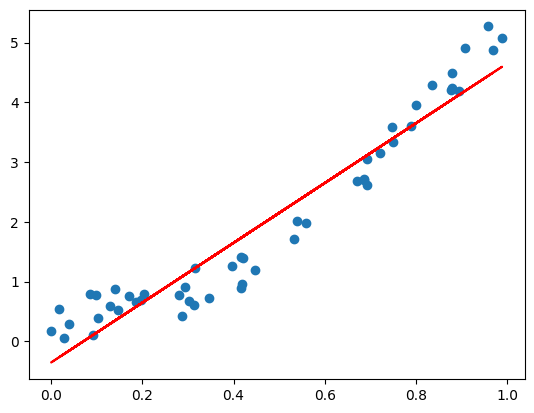

In [7]:
plt.scatter(X , Y)
plt.plot(X , y_pred , color = 'red')
plt.show()

In [8]:
X_poly = np.hstack((X , X**2))

In [9]:
model = LinearRegression()
model.fit(X_poly , Y)
y_pred = model.predict(X_poly)
print("R-Square: " , r2_score(Y , y_pred))

R-Square:  0.9801546617196594


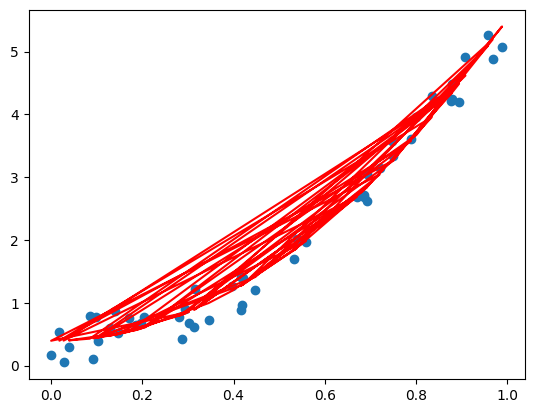

In [10]:
plt.scatter(X, Y)
plt.plot(X , y_pred , color='red')
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

In [12]:
X_poly

array([[1.00000000e+00, 4.17022005e-01, 1.73907352e-01, 7.25231927e-02,
        3.02437672e-02],
       [1.00000000e+00, 7.20324493e-01, 5.18867376e-01, 3.73752880e-01,
        2.69223354e-01],
       [1.00000000e+00, 1.14374817e-04, 1.30815988e-08, 1.49620548e-12,
        1.71128228e-16],
       [1.00000000e+00, 3.02332573e-01, 9.14049845e-02, 2.76347041e-02,
        8.35487119e-03],
       [1.00000000e+00, 1.46755891e-01, 2.15372915e-02, 3.16072440e-03,
        4.63854925e-04],
       [1.00000000e+00, 9.23385948e-02, 8.52641608e-03, 7.87317280e-04,
        7.26997712e-05],
       [1.00000000e+00, 1.86260211e-01, 3.46928663e-02, 6.46190062e-03,
        1.20359498e-03],
       [1.00000000e+00, 3.45560727e-01, 1.19412216e-01, 4.12641722e-02,
        1.42592773e-02],
       [1.00000000e+00, 3.96767474e-01, 1.57424429e-01, 6.24608929e-02,
        2.47824507e-02],
       [1.00000000e+00, 5.38816734e-01, 2.90323473e-01, 1.56431145e-01,
        8.42877189e-02],
       [1.00000000e+00, 4.1919

In [13]:
d = 5
l = []
for i in range(1 , d):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly , Y)
    y_pred = model.predict(X_poly)
    l.append(r2_score(Y , y_pred))
    

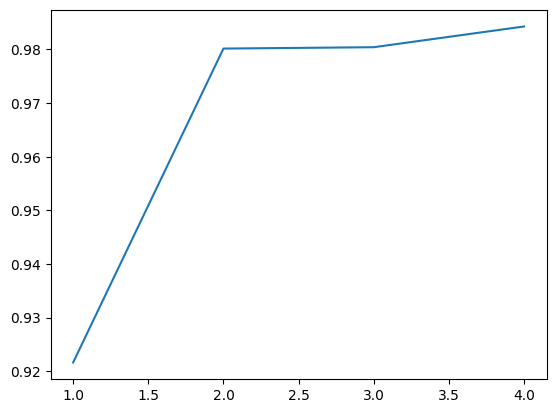

In [14]:
plt.plot(range(1 , d) , l)

In [15]:
l

[0.9216395660346501,
 0.9801546617196594,
 0.9804103149781674,
 0.9842741414017582]

In [16]:
# UnderFitting:- When the model is not available to underline the patterns in the data (High Bias , Low Variance)
# OverFitting:- When the model does not learn or create a pattern instead it is learning the data (Low Bias , High Variance)
# Good Fit :- When model learns the pattern and predict on a new data efficiently (Mid Bias , Mid Variance)


In [17]:
# Bias:- Amount of error done by the model on training data (Error done in predictoion of the training data)
# Variance:- Senstivity of the model towards the training data (Any change in data point disturbs the model)

In [18]:
# Occum's Razor
# choose a model with complexity as low as possible and performance as high as possible (model with less number of features but high prediction )